In [36]:
from fastai.vision.all import *

In [ ]:
from jmd_imagescraper.core import *
from jmd_imagescraper.imagecleaner import *

In [ ]:
sports = ['cricket','tennis','football','baseball']
path = Path().cwd()/'images'

In [ ]:
duckduckgo_search(path,'cricket','cricket',max_results=150)

In [ ]:
duckduckgo_search(path,'tennis','tennis',max_results=150)

In [ ]:
duckduckgo_search(path,'football','football',max_results=150)

In [ ]:
duckduckgo_search(path,'baseball','baseball',max_results=150)

In [64]:
sportsData = DataBlock(blocks=(ImageBlock,CategoryBlock),
                      get_items=get_image_files,
                      splitter= RandomSplitter(seed=42,valid_pct=0.2),
                      get_y=parent_label,
                      item_tfms=Resize(224))

In [65]:
data = sportsData.new(item_tfms=RandomResizedCrop(224,min_scale=0.5),batch_tfms=aug_transforms())

In [40]:
imagepath = Path('images')

In [41]:
path.ls()

(#5) [Path('images/.ipynb_checkpoints'),Path('images/cricket'),Path('images/tennis'),Path('images/football'),Path('images/baseball')]

In [45]:
fns = get_image_files(imagepath)

In [46]:
fns

(#600) [Path('images/cricket/001_1086bd39.jpg'),Path('images/cricket/002_ae9f8a3c.jpg'),Path('images/cricket/003_2f16736c.jpg'),Path('images/cricket/004_4560c7e4.jpg'),Path('images/cricket/005_9173a31a.jpg'),Path('images/cricket/006_73a336f8.jpg'),Path('images/cricket/007_d6c7542f.jpg'),Path('images/cricket/008_d5dbad1b.jpg'),Path('images/cricket/009_137b5b80.jpg'),Path('images/cricket/010_499d9e99.jpg')...]

In [50]:
from fastai.vision.all import *

In [61]:
imagepath = Path('images')

In [66]:
dls = data.dataloaders(imagepath)

In [67]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.123070,0.922445,0.341667,00:02


epoch,train_loss,valid_loss,error_rate,time
0,1.002062,0.649375,0.266667,00:02
1,0.751675,0.592853,0.216667,00:02
2,0.581207,0.608972,0.216667,00:02
3,0.498141,0.661364,0.216667,00:02


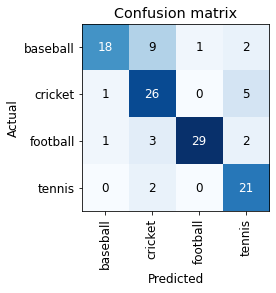

In [68]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [69]:
dummy_input = torch.randn(1, 3, 224, 224, device='cuda')
onnx_path =  "./model.onnx"
torch.onnx.export(learn.model, dummy_input, onnx_path, verbose=False)